# Clase 10: entornos virtuales + popurrí de libs

Docente: Emiliano López - ``emiliano.lopez@gmail.com`` - tw: @yosobreip
- Fecha: 28/11/2019 - **ÚLTIMA CLASE**

## Entornos virtuales

Algunas definiciones importantes:

- Un **entorno virtual** es una herramienta que ayuda a mantener las dependencias requeridas por diferentes proyectos en forma aislada. Es un directorio que contiene una colección específica de paquetes que se han instalado. 
- **Dependencias:** son paquetes necesarios o requeridos para que otro paquete funcione. Por ejemplo, pandas requiere numpy.
- **Channels:** son los repositorios online donde se almacenan los paquetes disponibles para ser instalados. La búsqueda de paquetes se realiza en los channels configurados. Algunos canales mas populares:
    - conda-forge: es un canal mantenido por la comunidad (https://conda-forge.org/)
    - bioconda: paquetes de bioinformática (https://bioconda.github.io/)

https://docs.conda.io/projects/conda/en/latest/_downloads/843d9e0198f2a193a3484886fa28163c/conda-cheatsheet.pdf

### Mediante Anaconda Navigator

- https://docs.anaconda.com/anaconda/navigator/tutorials/manage-environments/

### Mediante conda (consola)

- https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html

#### Ver la lista de paquetes instalados en un entorno especifico


`conda list` si ya estás en el entorno o `conda list -n myenv` para un entorno denominado `myenv`

#### Compartir un entorno

Para reproducir un determinado entorno en otra PC o simplemente replicarlo en necesario exportar un archivo con toda la información sobre los paquetes instalados y su versión. Para esto es necesario generar un archivo denominado `environment.yml`. 

- Activar el entorno: `conda activate myenv` (myenv es el nombre del entorno)
- Exportar el entorno: `conda env export > environment.yml`
- Enviar el archivo exportado



## Popurrí de libs

- Leer la documentación sobre la forma recomendable de instalar, en general:
    - Preferentemente desde anaconda navigator o bien usando su comando equivalente: `conda install -c conda-forge camelot-py`
    - Si por alguna razón lo anterior no se pudo: `pip install camelot-py[cv]`

### GeoPandas

The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

- https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html
- https://geopandas.readthedocs.io/en/latest/gallery/index.html


In [1]:
import pandas as pd
import geopandas as gpd
%matplotlib inline

In [2]:
df = pd.DataFrame({
                    'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
                    'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
                    'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
                    'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]
                  })
df.head()

City    Country  Latitude  Longitude
0  Buenos Aires  Argentina    -34.58     -58.66
1      Brasilia     Brazil    -15.78     -47.91
2      Santiago      Chile    -33.45     -70.66
3        Bogota   Colombia      4.60     -74.08
4       Caracas  Venezuela     10.48     -66.86

In [3]:
# convierto dataframe -> geodataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.head()

City    Country  Latitude  Longitude                     geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91000 -15.78000)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66000 -33.45000)
3        Bogota   Colombia      4.60     -74.08    POINT (-74.08000 4.60000)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86000 10.48000)

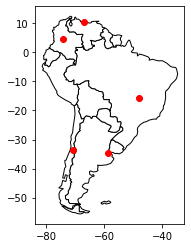

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# restringimos a Sud America.
ax = world[world.continent == 'South America'].plot(color='white', edgecolor='black')

# ploteamos el GeoDataFrame
gdf.plot(ax=ax, color='red');

In [24]:
# otro ejemplo
df2 = pd.read_csv('https://query.data.world/s/6joi7hjgjmwifhl2clpldwm36xmvmx')

In [25]:
df2.head()

X          Y  OBJECTID       CCN            REPORTDATETIME  \
0 -76.946978  38.893354    182201  16015685  2016-01-31T23:17:56.000Z   
1 -77.038520  38.904251    182202  16015745  2016-02-01T00:00:00.000Z   
2 -77.026528  38.898317    182203  16015704  2016-02-01T01:15:34.000Z   
3 -77.027916  38.939215    182204  16015736  2016-02-01T01:35:52.000Z   
4 -76.970423  38.867778    182205  16015695  2016-02-01T02:17:26.000Z   

      SHIFT                     OFFENSE  METHOD          LASTMODIFIEDDATE  \
0  MIDNIGHT                     ROBBERY     GUN  2016-06-24T08:32:06.000Z   
1  MIDNIGHT                    HOMICIDE   KNIFE  2016-06-24T08:32:18.000Z   
2  MIDNIGHT  ASSAULT W/DANGEROUS WEAPON  OTHERS  2016-06-24T08:32:06.000Z   
3  MIDNIGHT                THEFT F/AUTO  OTHERS  2016-06-24T08:32:06.000Z   
4  MIDNIGHT                THEFT F/AUTO  OTHERS  2016-06-24T08:32:06.000Z   

                         BLOCKSITEADDRESS  ...  ANC  DISTRICT    PSA  \
0       300 - 499 BLOCK OF 40TH STREET NE  ...   7F     SIXTH  603.0   
1     1100 - 1129 BLOCK OF 17TH STREET NW  ...   2B    SECOND  207.0   
2        1000 - 1099 BLOCK OF G STREET NW  ...   2C     FIRST  101.0   
3  3900  - 3999 BLOCK OF KANSAS AVENUE NW  ...   4C    FOURTH  404.0   
4      2501 2600  BLOCK OF NAYLOR ROAD SE  ...   8A   SEVENTH  701.0   

  NEIGHBORHOODCLUSTER BUSINESSIMPROVEMENTDISTRICT  BLOCK_GROUP  CENSUS_TRACT  \
0                32.0                         NaN     009603 2        9603.0   
1                 6.0             GOLDEN TRIANGLE     010700 1       10700.0   
2                 8.0                    DOWNTOWN     005800 1        5800.0   
3                18.0                         NaN     002502 1        2502.0   
4                34.0                         NaN     007605 2        7605.0   

  VOTING_PRECINCT                START_DATE                  END_DATE  
0    Precinct 102  2016-01-31T22:20:50.000Z  2016-01-31T22:25:53.000Z  
1     Precinct 17  2016-01-31T23:41:29.000Z  2016-01-31T23:51:21.000Z  
2    Precinct 129  2016-01-31T22:24:56.000Z  2016-01-31T22:35:18.000Z  
3     Precinct 47  2016-02-01T00:55:58.000Z  2016-02-01T01:10:47.000Z  
4    Precinct 112  2016-01-31T20:00:53.000Z  2016-01-31T21:00:17.000Z  

[5 rows x 23 columns]

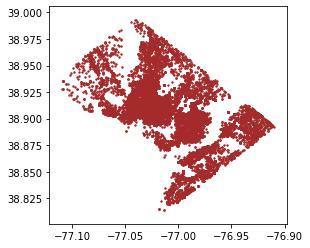

In [27]:

gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.X, df2.Y), crs={"init":"epsg:4326"})
gdf.plot(markersize=2, color="brown")


### PDFs

- tabula https://pypi.org/project/tabula-py/
- PyPDF2 https://dzone.com/articles/an-intro-to-pypdf2
- Camelot-py https://camelot-py.readthedocs.io/en/master/

In [5]:
import tabula

# Read pdf into DataFrame
df = tabula.read_pdf("datos/ipc.pdf", pages='3')

# Read remote pdf into DataFrame
#df2 = tabula.read_pdf("https://github.com/tabulapdf/tabula-java/raw/master/src/test/resources/technology/tabula/arabic.pdf")

# convert PDF into CSV
#tabula.convert_into("test.pdf", "output.csv", output_format="csv", pages='all')

# convert all PDFs in a directory
#tabula.convert_into_by_batch("input_directory", output_format='csv', pages='all)

In [6]:
df.head()

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0          Nivel general y divisiones   Nacional        NaN        NaN   
1                                 NaN        NaN        GBA   Pampeana   
2                                 NaN        NaN        NaN        NaN   
3                       Nivel general        3,3        3,2        3,4   
4  Alimentos y bebidas no alcohólicas        2,5        2,5        2,6   

  Región geográfica del país Unnamed: 5 Unnamed: 6  
0                        NaN        NaN        NaN  
1           Noreste Noroeste       Cuyo  Patagonia  
2                 Porcentaje        NaN        NaN  
3                    3,3 2,9        3,7        3,2  
4                    2,2 1,7        2,2        3,1

In [33]:
from PyPDF2 import PdfFileReader

def extraer_texto(path, pagina):
    """muestro texto extraído del pdf
       entrada: 
           - path: ruta y nombre de archivo pdf
           - pagina: nro de página a extraer texto
       salida: imprime texto crudo extraído
    """
    f =  open(path, 'rb')
    pdf = PdfFileReader(f)
    # voy a la página 
    page = pdf.getPage(pagina)
    print(page)
    print('Page type: {}'.format(str(type(page))))
    text = page.extractText()
    print(text)

if __name__ == '__main__':
    path = 'datos/ipc.pdf'
    extraer_texto(path, 3)

{'/ArtBox': [0, 0, 595.276, 841.89], '/BleedBox': [0, 0, 595.276, 841.89], '/Contents': IndirectObject(26, 0), '/CropBox': [0, 0, 595.276, 841.89], '/MediaBox': [0, 0, 595.276, 841.89], '/Parent': IndirectObject(102, 0), '/PieceInfo': {'/InDesign': {'/DocumentID': 'xmp.did:29bc30fa-d13e-004c-921e-cf2c1e143b81', '/LastModified': 'D:20191114183758Z', '/NumberofPages': 1, '/OriginalDocumentID': 'xmp.did:3d36aa73-578a-934a-b717-86b0d1b66332', '/PageUIDList': {'/0': 248}, '/PageWidthList': {'/0': 595.276}}}, '/Resources': {'/ExtGState': {'/GS0': IndirectObject(111, 0), '/GS1': IndirectObject(122, 0), '/GS2': IndirectObject(89, 0), '/GS3': IndirectObject(87, 0)}, '/Font': {'/T1_0': IndirectObject(110, 0), '/T1_1': IndirectObject(115, 0), '/T1_2': IndirectObject(90, 0), '/T1_3': IndirectObject(71, 0), '/T1_4': IndirectObject(75, 0), '/T1_5': IndirectObject(82, 0)}, '/ProcSet': ['/PDF', '/Text'], '/XObject': {'/Fm0': IndirectObject(70, 0), '/Fm1': IndirectObject(69, 0)}}, '/Rotate': 0, '/TrimB

In [3]:
# otra lib que no me funcionó

#import camelot
#tables = camelot.read_pdf('datos/ipc.pdf', pages='3')

# en tables tenemos una lista de objetos tablas
#tables

In [2]:
# accedemos a las tablas por indice
#tables[0]
# vemos un reporte sobre cuan precisa fue la extracción
#tables[0].parsing_report

# la convertimos a dataframe
#tables[0].df

### Requests y Beautiful soup

- https://2.python-requests.org/en/master/
- https://realpython.com/python-requests/
- https://pypi.org/project/beautifulsoup4/
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/

#### Sitios de estaciones meteorológicas

In [7]:
#http://www.mercobras.com.ar/datos/DatosMeteorologicos.htm
#https://www.cerrocastor.com/meteobase/emabase/meteobase.htm
import requests
sitio = requests.get('https://www.cerrocastor.com/meteobase/emabase/meteobase.htm')


sitio.status_code
sitio.content

b'<HTML>\n<HEAD>\n<TITLE>Datos&nbsp; meteorol\xf3gicos actuales, maximas y m\xednimas</TITLE>\n<meta http-equiv="refresh" content="150";>\n</HEAD>\n<BODY bgcolor=PaleGoldenrod>\n\n<table border="1" bordercolordark="#000000" bordercolorlight="#000000"  cellpadding=2 cellspacing=2>\n<tr height="30">\n <td align=center bordercolor="#000000" colspan="2"\n style="border: thin solid rgb(0,0,0)">\n\t<img border="0" src="LogoRGB.jpg" width="160" height="83"></td>\n<td width="700">\n<p align="center">\n<font size="5">Cerro Castor - Ushuaia - Argentina</font></p>\n<p align="center">\n<font size="5">Estaci\xf3n Meteorol\xf3gica Autom\xe1tica en Base</font></p>\n<p align="center">\nEstaci\xf3n Meteorol\xf3gica Davis Instruments:&nbsp; instalaci\xf3n: <a href="http://www.ingalvarez.com.ar">www.ingalvarez.com.ar</a>\n</p>\n</td>\n </tr>\n <tr>\n<td bordercolor="#000000" bgcolor="#000000" colspan="2"\n style="border: thin solid rgb(0,0,0)"><font face="verdana, Arial, Helvetica"><strong><font color="#

In [48]:
print(sitio.text)

<HTML>
<HEAD>
<TITLE>Datos&nbsp; meteorológicos actuales, maximas y mínimas</TITLE>
<meta http-equiv="refresh" content="150";>
</HEAD>
<BODY bgcolor=PaleGoldenrod>

<table border="1" bordercolordark="#000000" bordercolorlight="#000000"  cellpadding=2 cellspacing=2>
<tr height="30">
 <td align=center bordercolor="#000000" colspan="2"
 style="border: thin solid rgb(0,0,0)">
	<img border="0" src="LogoRGB.jpg" width="160" height="83"></td>
<td width="700">
<p align="center">
<font size="5">Cerro Castor - Ushuaia - Argentina</font></p>
<p align="center">
<font size="5">Estación Meteorológica Automática en Base</font></p>
<p align="center">
Estación Meteorológica Davis Instruments:&nbsp; instalación: <a href="http://www.ingalvarez.com.ar">www.ingalvarez.com.ar</a>
</p>
</td>
 </tr>
 <tr>
<td bordercolor="#000000" bgcolor="#000000" colspan="2"
 style="border: thin solid rgb(0,0,0)"><font face="verdana, Arial, Helvetica"><strong><font color="#A8B8C8"><big>Datos
  Cerro Castor Base</big></font>

In [42]:
from bs4 import BeautifulSoup

In [49]:
soup = BeautifulSoup(sitio.text, 'html.parser')
print(soup.prettify())
#soup.find_all('p')[2].get_text()

<html>
 <head>
  <title>
   Datos  meteorológicos actuales, maximas y mínimas
  </title>
  <meta ;="" content="150" http-equiv="refresh"/>
 </head>
 <body bgcolor="PaleGoldenrod">
  <table border="1" bordercolordark="#000000" bordercolorlight="#000000" cellpadding="2" cellspacing="2">
   <tr height="30">
    <td align="center" bordercolor="#000000" colspan="2" style="border: thin solid rgb(0,0,0)">
     <img border="0" height="83" src="LogoRGB.jpg" width="160"/>
    </td>
    <td width="700">
     <p align="center">
      <font size="5">
       Cerro Castor - Ushuaia - Argentina
      </font>
     </p>
     <p align="center">
      <font size="5">
       Estación Meteorológica Automática en Base
      </font>
     </p>
     <p align="center">
      Estación Meteorológica Davis Instruments:  instalación:
      <a href="http://www.ingalvarez.com.ar">
       www.ingalvarez.com.ar
      </a>
     </p>
    </td>
   </tr>
   <tr>
    <td bgcolor="#000000" bordercolor="#000000" colspan="2" st

#### Ejemplo tapas de diario

- https://tapas.clarin.com/

In [8]:
lista_tapas = []
for anio in range(1976, 2020):
    url = f"https://tapas.clarin.com/tapa/{anio}/03/24/{anio}0324_thumb.jpg"
    lista_tapas.append(url)

In [9]:
lista_tapas

['https://tapas.clarin.com/tapa/1976/03/24/19760324_thumb.jpg',
 'https://tapas.clarin.com/tapa/1977/03/24/19770324_thumb.jpg',
 'https://tapas.clarin.com/tapa/1978/03/24/19780324_thumb.jpg',
 'https://tapas.clarin.com/tapa/1979/03/24/19790324_thumb.jpg',
 'https://tapas.clarin.com/tapa/1980/03/24/19800324_thumb.jpg',
 'https://tapas.clarin.com/tapa/1981/03/24/19810324_thumb.jpg',
 'https://tapas.clarin.com/tapa/1982/03/24/19820324_thumb.jpg',
 'https://tapas.clarin.com/tapa/1983/03/24/19830324_thumb.jpg',
 'https://tapas.clarin.com/tapa/1984/03/24/19840324_thumb.jpg',
 'https://tapas.clarin.com/tapa/1985/03/24/19850324_thumb.jpg',
 'https://tapas.clarin.com/tapa/1986/03/24/19860324_thumb.jpg',
 'https://tapas.clarin.com/tapa/1987/03/24/19870324_thumb.jpg',
 'https://tapas.clarin.com/tapa/1988/03/24/19880324_thumb.jpg',
 'https://tapas.clarin.com/tapa/1989/03/24/19890324_thumb.jpg',
 'https://tapas.clarin.com/tapa/1990/03/24/19900324_thumb.jpg',
 'https://tapas.clarin.com/tapa/1991/03/

In [11]:
import requests

for i,tapa in enumerate(lista_tapas):
    y = 1976 + i
    response = requests.get(tapa)
    if response.status_code == 200:
        f = open(f"{y}-tapa.jpg", 'wb')
        f.write(response.content)
        f.close()

### tessearc

- OCR https://pypi.org/project/pytesseract/


### tweepy

- https://apps.twitter.com/
cuenta: CientificoFe

- https://github.com/tweepy/tweepy
- https://towardsdatascience.com/extracting-twitter-data-pre-processing-and-sentiment-analysis-using-python-3-0-7192bd8b47cf
- https://www.earthdatascience.org/courses/earth-analytics-python/using-apis-natural-language-processing-twitter/get-and-use-twitter-data-in-python/
- https://realpython.com/twitter-bot-python-tweepy/






In [12]:
import tweepy

# completar con lo generado en apps.twitter.com
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

# Authenticate to Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [57]:
#for tweet in api.search(q="Python", lang="en", rpp=10):
#    print(f"{tweet.user.name}:{tweet.text}")

In [13]:
trends_result = api.trends_place(1)
for trend in trends_result[0]["trends"]:
    print(trend["name"])

Happy Thanksgiving
M@GIC
#blackfridaychocobonplan
#EXOLBACOT
#FelizJueves
#ゲーム依存度診断
アストルフォ
#TerroristPragyaThakur
シリウス
엑소 콘서트
ヒチョン
イベ乙
野中隊
#MobileBlackPcComponentes
#ONEYEARtheseriesEP1
#EkonomiKötü
#ドクターX
#いいニーハイの日
#VSexiestMan2019
#REKNOWLayZhang
#DespedidaGugu
#28Nov
#ThursdayThoughts
#ElSalarioDeLosCongresistas
#LeyAntiencapuchados
#malamjumat
#素のWoman
#ぼち夜鑑賞会
#ケンミンショー
#クイズハッカー
#カルロピノ
#الدخان_الجديد_مغشوش
#كم_سهم_اشتريت_من_شركه_ارامكو
#ヒメヒナ帝国集会
#bbcimpartiality
#عملاق_اسيا
#WelcomeToJakartaDAY6
#大親友のしげおかくん
#DMDlilerneistiyor
#モトカレマニア
#YılBitiyorSağlıkçıBekliyor
#فیر_آیا_جے_باجوہ
#シロ生放送
#SorryBalaSaheb
#AWAでももいろ歌合戦
#haysholidaysleigh
#ÜmitLenMeyinTFF
#ShivajiPark
#TheGiftPagsagip
#HIP4THWIN



### CFD

- http://cav2012.sg/cdohl/CFD_course/index.html
- https://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/
- https://github.com/barbagroup/CFDPython

## Webs recomendadas

- https://nbviewer.jupyter.org/
- https://www.earthdatascience.org/
- https://realpython.com/